# 1)
## Existen 50 personas en sala de espera, todos manifestando una gripa fuerte. Se le contrata para diseñar un sistema que le permita discernir quiénes debe ir a sala COVID y quienes deben acudir a urgencias.

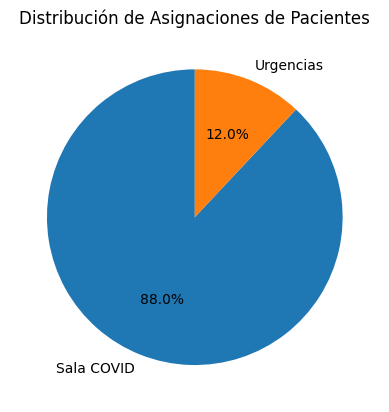

Resumen de estadísticas:
Total de pacientes: 50
Pacientes en Sala COVID: 44
Pacientes en Urgencias: 6
Pacientes en Espera: 0
Porcentaje Sala COVID: 88.00%
Porcentaje Urgencias: 12.00%
Porcentaje Espera: 0.00%


In [4]:
import random
import os
import matplotlib.pyplot as plt
from collections import Counter

class Paciente:
    def __init__(self, id, saturacion_oxigeno, vacunas):
        self.id = id
        self.saturacion_oxigeno = saturacion_oxigeno
        self.vacunas = vacunas
        self.prueba_covid = None
        self.asignacion = None  # COVID, Urgencias o Espera

    def realizar_prueba_covid(self):
        self.prueba_covid = random.choice([True, False])

    def __str__(self):
        return (f"Paciente {self.id}: Saturación={self.saturacion_oxigeno}, "
                f"Vacunas={self.vacunas}, Prueba COVID={self.prueba_covid}, "
                f"Asignación={self.asignacion}")

class SistemaHospitalario:
    def __init__(self):
        self.pacientes = []
        self.capacidad_urgencias = 10
        self.camas_ocupadas_urgencias = 0

    def generar_datos_aleatorios(self, num_pacientes=50):
        # Generar datos para 50 pacientes y guardarlos en un archivo
        with open('pacientes.txt', 'w') as file:
            for i in range(1, num_pacientes + 1):
                saturacion = random.randint(70, 100)  # Saturación entre 70 y 100
                vacunas = random.randint(0, 4)  # Vacunas entre 0 y 4
                file.write(f"{i},{saturacion},{vacunas}\n")
                paciente = Paciente(i, saturacion, vacunas)
                self.pacientes.append(paciente)

    def asignar_pacientes(self):
        for paciente in self.pacientes:
            # Criterio 1: Saturación de oxígeno menor a 90
            if paciente.saturacion_oxigeno < 90:
                paciente.asignacion = "Sala COVID"
            # Criterio 2: Menos de 2 vacunas
            elif paciente.vacunas < 2:
                paciente.asignacion = "Sala COVID"
            else:
                # Criterio 3: Prueba de COVID si los anteriores no son concluyentes
                paciente.realizar_prueba_covid()
                if paciente.prueba_covid:
                    paciente.asignacion = "Sala COVID"
                else:
                    # Criterio 4: Enviar a urgencias si no cumple los criterios anteriores
                    if self.camas_ocupadas_urgencias < self.capacidad_urgencias:
                        paciente.asignacion = "Urgencias"
                        self.camas_ocupadas_urgencias += 1
                    else:
                        paciente.asignacion = "Espera"

    def guardar_resultados(self):
        # Guardar los resultados en un archivo
        with open('resultados.txt', 'w') as file:
            for paciente in self.pacientes:
                file.write(str(paciente) + "\n")

    def graficar_resultados(self):
        asignaciones = [paciente.asignacion for paciente in self.pacientes]
        conteo = Counter(asignaciones)


        etiquetas = list(conteo.keys())
        valores = list(conteo.values())
        plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
        plt.title("Distribución de Asignaciones de Pacientes")
        plt.show()

        # Calcular estadísticas
        total_pacientes = len(self.pacientes)
        pacientes_covid = conteo.get("Sala COVID", 0)
        pacientes_urgencias = conteo.get("Urgencias", 0)
        pacientes_espera = conteo.get("Espera", 0)

        porcentaje_covid = (pacientes_covid / total_pacientes) * 100
        porcentaje_urgencias = (pacientes_urgencias / total_pacientes) * 100
        porcentaje_espera = (pacientes_espera / total_pacientes) * 100


        print("Resumen de estadísticas:")
        print(f"Total de pacientes: {total_pacientes}")
        print(f"Pacientes en Sala COVID: {pacientes_covid}")
        print(f"Pacientes en Urgencias: {pacientes_urgencias}")
        print(f"Pacientes en Espera: {pacientes_espera}")
        print(f"Porcentaje Sala COVID: {porcentaje_covid:.2f}%")
        print(f"Porcentaje Urgencias: {porcentaje_urgencias:.2f}%")
        print(f"Porcentaje Espera: {porcentaje_espera:.2f}%")


if __name__ == "__main__":
    # Crear una instancia del sistema hospitalario
    sistema = SistemaHospitalario()

    # Generar datos aleatorios y guardarlos en un archivo
    sistema.generar_datos_aleatorios()

    # Asignar pacientes a las salas correspondientes
    sistema.asignar_pacientes()

    # Guardar los resultados en un archivo
    sistema.guardar_resultados()

    # Graficar los resultados y mostrar estadísticas
    sistema.graficar_resultados()

#2)
##Desarrollar un sistema que indique de m personas, a cuántas se les dará el crédito o no. El sistema deberá generar un aviso indicando si la persona puede obtener el crédito (esto es cuando obtiene una puntuación mayor o igual a 6 puntos).

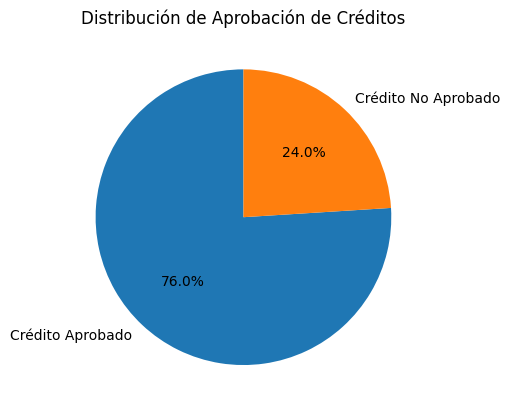

Resumen de estadísticas:
Total de personas: 50
Personas con crédito aprobado: 38
Personas con crédito no aprobado: 12
Porcentaje de créditos aprobados: 76.00%
Porcentaje de créditos no aprobados: 24.00%


In [5]:
import random
import os
import matplotlib.pyplot as plt
from collections import Counter


class Persona:
    def __init__(self, id):
        self.id = id

        self.tarjetas_otras_franquicias = random.choice([True, False])
        self.reportado_riesgo = random.choice([True, False])
        self.tipo_contrato = random.choice(["definido", "indefinido", "ninguno"])
        self.creditos_otra_entidad = random.choice([True, False])
        self.creditos_misma_entidad = random.choice([True, False])
        self.edad = random.randint(18, 70)  # Edad entre 18 y 70
        self.puntuacion = 0
        self.credito_aprobado = None

    def calcular_puntuacion(self):
        # Calcular la puntuación según los criterios
        self.puntuacion = 0
        if self.tarjetas_otras_franquicias:
            self.puntuacion += 1
        if not self.reportado_riesgo:
            self.puntuacion += 3
        if self.tipo_contrato == "definido":
            self.puntuacion += 2
        elif self.tipo_contrato == "indefinido":
            self.puntuacion += 3
        if self.creditos_otra_entidad:
            self.puntuacion += 2
        if self.creditos_misma_entidad:
            self.puntuacion += 3
        if 18 <= self.edad <= 22:
            self.puntuacion += 2
        elif 23 <= self.edad <= 30:
            self.puntuacion += 4
        elif 31 <= self.edad <= 40:
            self.puntuacion += 3
        elif self.edad > 41:
            self.puntuacion += 1

        # Determinar si el crédito es aprobado
        self.credito_aprobado = self.puntuacion >= 6

    def __str__(self):
        return (f"Persona {self.id}: Puntuación={self.puntuacion}, "
                f"Crédito Aprobado={'Sí' if self.credito_aprobado else 'No'}, "
                f"Tarjetas otras franquicias={self.tarjetas_otras_franquicias}, "
                f"Reportado riesgo={self.reportado_riesgo}, "
                f"Tipo contrato={self.tipo_contrato}, "
                f"Créditos otra entidad={self.creditos_otra_entidad}, "
                f"Créditos misma entidad={self.creditos_misma_entidad}, "
                f"Edad={self.edad}")


class SistemaCreditos:
    def __init__(self):
        self.personas = []

    def generar_datos_aleatorios(self, num_personas=50):
        # Generar datos para 50 personas y guardarlos en un archivo
        with open('personas.txt', 'w') as file:
            for i in range(1, num_personas + 1):
                persona = Persona(i)
                file.write(f"{i},{persona.tarjetas_otras_franquicias},"
                           f"{persona.reportado_riesgo},{persona.tipo_contrato},"
                           f"{persona.creditos_otra_entidad},"
                           f"{persona.creditos_misma_entidad},{persona.edad}\n")
                self.personas.append(persona)

    def evaluar_creditos(self):
        for persona in self.personas:
            persona.calcular_puntuacion()

    def guardar_resultados(self):
        # Guardar los resultados en un archivo
        with open('resultados_creditos.txt', 'w') as file:
            for persona in self.personas:
                file.write(str(persona) + "\n")

    def graficar_resultados(self):
        resultados = [persona.credito_aprobado for persona in self.personas]
        conteo = Counter(resultados)

        etiquetas = ['Crédito Aprobado', 'Crédito No Aprobado']
        valores = [conteo.get(True, 0), conteo.get(False, 0)]
        plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
        plt.title("Distribución de Aprobación de Créditos")
        plt.show()

        total_personas = len(self.personas)
        aprobados = conteo.get(True, 0)
        no_aprobados = conteo.get(False, 0)
        porcentaje_aprobados = (aprobados / total_personas) * 100
        porcentaje_no_aprobados = (no_aprobados / total_personas) * 100


        print("Resumen de estadísticas:")
        print(f"Total de personas: {total_personas}")
        print(f"Personas con crédito aprobado: {aprobados}")
        print(f"Personas con crédito no aprobado: {no_aprobados}")
        print(f"Porcentaje de créditos aprobados: {porcentaje_aprobados:.2f}%")
        print(f"Porcentaje de créditos no aprobados: {porcentaje_no_aprobados:.2f}%")

# Ejecución del programa
if __name__ == "__main__":
    # Crear una instancia del sistema de créditos
    sistema = SistemaCreditos()

    # Generar datos aleatorios y guardarlos en un archivo
    sistema.generar_datos_aleatorios()

    # Evaluar los créditos
    sistema.evaluar_creditos()

    # Guardar los resultados en un archivo
    sistema.guardar_resultados()

    # Graficar los resultados
    sistema.graficar_resultados()

# 3)
## Emular el comportamiento de un sensor de humedad que registra 20 tomas en un día, entre los valores de 0 a 10. Genere un sistema de alerta si la humedad disminuye por debajo de 3 (humedad baja) y si supera los 8 (alta humedad)

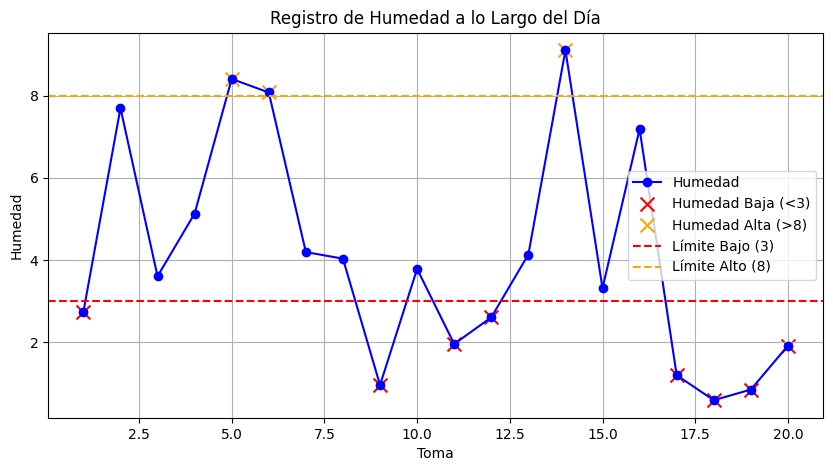

Resumen de estadísticas:
Total de tomas: 20
Tomas con humedad baja: 8
Tomas con humedad alta: 3
Tomas con humedad normal: 9
Porcentaje humedad baja: 40.00%
Porcentaje humedad alta: 15.00%
Porcentaje humedad normal: 45.00%


In [6]:
import random
import os
import matplotlib.pyplot as plt


class MedicionHumedad:
    def __init__(self, id, valor_humedad):
        self.id = id
        self.valor_humedad = valor_humedad
        self.alerta = None
        self.accion_grifo = None
        self.accion_absorber_agua = False

    def __str__(self):
        return (f"Toma {self.id}: Humedad={self.valor_humedad}, "
                f"Alerta={self.alerta if self.alerta else 'Ninguna'}, "
                f"Acción Grifo={self.accion_grifo if self.accion_grifo else 'Ninguna'}, "
                f"Absorber Agua={'Sí' if self.accion_absorber_agua else 'No'}")


class SistemaSensorHumedad:
    def __init__(self):
        self.mediciones = []
        self.grifo_abierto = False

    def generar_datos_aleatorios(self, num_mediciones=20):
        # Generar 20 tomas de humedad y guardarlas en un archivo
        with open('humedad.txt', 'w') as file:
            for i in range(1, num_mediciones + 1):
                valor_humedad = round(random.uniform(0, 10), 2)  # Valor entre 0 y 10
                file.write(f"{i},{valor_humedad}\n")
                medicion = MedicionHumedad(i, valor_humedad)
                self.mediciones.append(medicion)

    def procesar_mediciones(self):
        for medicion in self.mediciones:
            # Generar alertas según el valor de humedad
            if medicion.valor_humedad < 3:
                medicion.alerta = "Humedad Baja"
            elif medicion.valor_humedad > 8:
                medicion.alerta = "Humedad Alta"

            # Controlar el actuador (grifo y sistema de absorción)
            if medicion.valor_humedad < 3:
                if not self.grifo_abierto:
                    medicion.accion_grifo = "Abrir Grifo"
                    self.grifo_abierto = True
            elif 3 <= medicion.valor_humedad <= 8:
                if self.grifo_abierto:
                    medicion.accion_grifo = "Cerrar Grifo"
                    self.grifo_abierto = False
            elif medicion.valor_humedad > 8:
                if self.grifo_abierto:
                    medicion.accion_grifo = "Cerrar Grifo"
                    self.grifo_abierto = False
                medicion.accion_absorber_agua = True

    def guardar_resultados(self):
        with open('resultados_humedad.txt', 'w') as file:
            for medicion in self.mediciones:
                file.write(str(medicion) + "\n")

    def graficar_resultados(self):
        tiempos = [medicion.id for medicion in self.mediciones]
        valores_humedad = [medicion.valor_humedad for medicion in self.mediciones]
        alertas_bajas = [medicion.valor_humedad if medicion.alerta == "Humedad Baja" else None for medicion in self.mediciones]
        alertas_altas = [medicion.valor_humedad if medicion.alerta == "Humedad Alta" else None for medicion in self.mediciones]

        plt.figure(figsize=(10, 5))
        plt.plot(tiempos, valores_humedad, label="Humedad", color="blue", marker="o")
        plt.scatter(tiempos, alertas_bajas, label="Humedad Baja (<3)", color="red", marker="x", s=100)
        plt.scatter(tiempos, alertas_altas, label="Humedad Alta (>8)", color="orange", marker="x", s=100)
        plt.axhline(y=3, color="red", linestyle="--", label="Límite Bajo (3)")
        plt.axhline(y=8, color="orange", linestyle="--", label="Límite Alto (8)")
        plt.xlabel("Toma")
        plt.ylabel("Humedad")
        plt.title("Registro de Humedad a lo Largo del Día")
        plt.legend()
        plt.grid(True)
        plt.show()


        total_mediciones = len(self.mediciones)
        bajas = sum(1 for m in self.mediciones if m.alerta == "Humedad Baja")
        altas = sum(1 for m in self.mediciones if m.alerta == "Humedad Alta")
        normales = total_mediciones - bajas - altas
        porcentaje_bajas = (bajas / total_mediciones) * 100
        porcentaje_altas = (altas / total_mediciones) * 100
        porcentaje_normales = (normales / total_mediciones) * 100

        print("Resumen de estadísticas:")
        print(f"Total de tomas: {total_mediciones}")
        print(f"Tomas con humedad baja: {bajas}")
        print(f"Tomas con humedad alta: {altas}")
        print(f"Tomas con humedad normal: {normales}")
        print(f"Porcentaje humedad baja: {porcentaje_bajas:.2f}%")
        print(f"Porcentaje humedad alta: {porcentaje_altas:.2f}%")
        print(f"Porcentaje humedad normal: {porcentaje_normales:.2f}%")

# Ejecución del programa
if __name__ == "__main__":
    # Crear una instancia del sistema de sensor de humedad
    sistema = SistemaSensorHumedad()

    # Generar datos aleatorios y guardarlos en un archivo
    sistema.generar_datos_aleatorios()

    # Procesar las mediciones
    sistema.procesar_mediciones()

    # Guardar los resultados en un archivo
    sistema.guardar_resultados()

    # Graficar los resultados
    sistema.graficar_resultados()

# 4)
##Emular el comportamiento del dólar en un día. Considere que la base está en 4000 pesos y que durante el día tendrá subidas y bajadas. Tome al menos un registro de 20 datos, y que la aleatoriedad debe darse entre 0 a 2000 pesos.

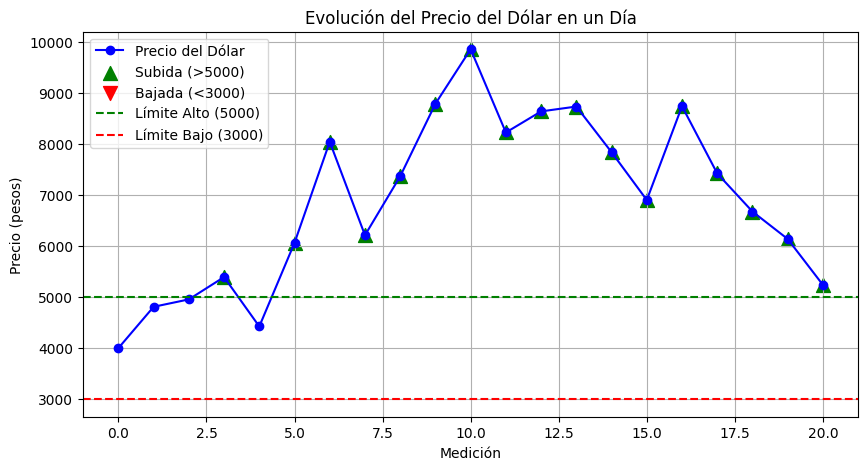

Resumen de estadísticas:
Total de mediciones: 20
Mediciones con subidas (>5000): 17
Mediciones con bajadas (<3000): 0
Precio final: 5237 pesos
Precio promedio: 6876.43 pesos
Porcentaje de subidas: 85.00%
Porcentaje de bajadas: 0.00%

Comunicado Final: El precio del dólar terminó en 5237 pesos y está a la baja respecto al valor anterior (6136 pesos).


In [7]:
import random
import os
import matplotlib.pyplot as plt


class MedicionDolar:
    def __init__(self, id, precio):
        self.id = id
        self.precio = precio
        self.comunicado = None

    def __str__(self):
        if self.comunicado:
            return f"Medición {self.id}: Precio={self.precio} pesos, Comunicado={self.comunicado}"
        return f"Medición {self.id}: Precio={self.precio} pesos"


class SistemaDolar:
    def __init__(self):
        self.mediciones = []
        self.precio_inicial = 4000

    def generar_datos_aleatorios(self, num_mediciones=20):
        precio_actual = self.precio_inicial
        with open('precios_dolar.txt', 'w') as file:
            file.write(f"0,{precio_actual}\n")
            medicion = MedicionDolar(0, precio_actual)
            self.mediciones.append(medicion)

            for i in range(1, num_mediciones + 1):
                variacion = random.randint(-2000, 2000)  # Variación entre -2000 y 2000
                precio_actual += variacion
                # Asegurar que el precio no sea negativo
                precio_actual = max(0, precio_actual)
                file.write(f"{i},{precio_actual}\n")
                medicion = MedicionDolar(i, precio_actual)
                self.mediciones.append(medicion)

    def procesar_mediciones(self):
        # Procesar las mediciones para generar comunicados
        for medicion in self.mediciones[1:]:
            if medicion.precio > 5000:
                medicion.comunicado = "Alerta: El precio del dólar ha subido por encima de 5000 pesos"
            elif medicion.precio < 3000:
                medicion.comunicado = "Alerta: El precio del dólar ha bajado por debajo de 3000 pesos"

        # Comunicado final
        ultima_medicion = self.mediciones[-1]
        penultima_medicion = self.mediciones[-2]
        tendencia = "al alza" if ultima_medicion.precio > penultima_medicion.precio else "a la baja"
        self.comunicado_final = (f"Comunicado Final: El precio del dólar terminó en {ultima_medicion.precio} pesos "
                                f"y está {tendencia} respecto al valor anterior ({penultima_medicion.precio} pesos).")

    def guardar_resultados(self):
        # Guardar los resultados en un archivo
        with open('resultados_dolar.txt', 'w') as file:
            for medicion in self.mediciones:
                file.write(str(medicion) + "\n")
            file.write("\n" + self.comunicado_final)

    def graficar_resultados(self):
        tiempos = [medicion.id for medicion in self.mediciones]
        precios = [medicion.precio for medicion in self.mediciones]
        subidas = [medicion.precio if medicion.comunicado and "subido" in medicion.comunicado else None for medicion in self.mediciones]
        bajadas = [medicion.precio if medicion.comunicado and "bajado" in medicion.comunicado else None for medicion in self.mediciones]


        plt.figure(figsize=(10, 5))
        plt.plot(tiempos, precios, label="Precio del Dólar", color="blue", marker="o")
        plt.scatter(tiempos, subidas, label="Subida (>5000)", color="green", marker="^", s=100)
        plt.scatter(tiempos, bajadas, label="Bajada (<3000)", color="red", marker="v", s=100)
        plt.axhline(y=5000, color="green", linestyle="--", label="Límite Alto (5000)")
        plt.axhline(y=3000, color="red", linestyle="--", label="Límite Bajo (3000)")
        plt.xlabel("Medición")
        plt.ylabel("Precio (pesos)")
        plt.title("Evolución del Precio del Dólar en un Día")
        plt.legend()
        plt.grid(True)
        plt.show()


        total_mediciones = len(self.mediciones) - 1  # Excluimos la medición inicial
        num_subidas = sum(1 for m in self.mediciones if m.comunicado and "subido" in m.comunicado)
        num_bajadas = sum(1 for m in self.mediciones if m.comunicado and "bajado" in m.comunicado)
        precio_final = self.mediciones[-1].precio
        precio_promedio = sum(m.precio for m in self.mediciones) / len(self.mediciones)
        porcentaje_subidas = (num_subidas / total_mediciones) * 100
        porcentaje_bajadas = (num_bajadas / total_mediciones) * 100

        print("Resumen de estadísticas:")
        print(f"Total de mediciones: {total_mediciones}")
        print(f"Mediciones con subidas (>5000): {num_subidas}")
        print(f"Mediciones con bajadas (<3000): {num_bajadas}")
        print(f"Precio final: {precio_final} pesos")
        print(f"Precio promedio: {precio_promedio:.2f} pesos")
        print(f"Porcentaje de subidas: {porcentaje_subidas:.2f}%")
        print(f"Porcentaje de bajadas: {porcentaje_bajadas:.2f}%")
        print(f"\n{self.comunicado_final}")

# Ejecución del programa
if __name__ == "__main__":
    # Crear una instancia del sistema de seguimiento del dólar
    sistema = SistemaDolar()

    # Generar datos aleatorios y guardarlos en un archivo
    sistema.generar_datos_aleatorios()

    # Procesar las mediciones
    sistema.procesar_mediciones()

    # Guardar los resultados en un archivo
    sistema.guardar_resultados()

    # Graficar los resultados
    sistema.graficar_resultados()